In [1]:
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving word2vec_size_50_all_datasets.model to word2vec_size_50_all_datasets.model


In [3]:
from google.colab import files

uploaded = files.upload()

Saving WordEmbeddingsKeyedVectors_size_50.model to WordEmbeddingsKeyedVectors_size_50.model


In [4]:
from google.colab import files

uploaded = files.upload()

Saving lady_mail.txt to lady_mail.txt


In [5]:
!pip install gensim
!pip install nltk

In [6]:
import pandas as pd
df_2 = pd.read_csv('lady_mail.txt')

In [7]:
sentences = []
for text in df_2['text']:
  s = text.strip().split('.')
  for x in s:
    sentences.append(x)
df = pd.DataFrame(sentences, columns =['text'])
df.head()

,text
0,Насыщенный интересный день
1,За любые дела вы беретесь с неподдельным энту...
2,Еще одной причиной этого является ваша способ...
3,"Вы не отказываете в поддержке, если она нужна..."
4,"Возможны знакомства, которые положат начало д..."


In [8]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
import re, string
from nltk.stem.snowball import SnowballStemmer

russian_stopwords = stopwords.words("russian")# собираем стоп слова
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])
russian_stopwords.extend(['будет', 'последнее', 'первой', 'второй', 'половине', 'во', 'начало', 'дня', 'время', 'этот', 'изза', 'за', 'чем', 'если', 'во', 'он', 'какието'])
russian_stopwords.extend(['первая', 'вторая', 'половина', 'вот', 'быть', 'как', 'в', 'к', 'на', 'можно'])

regex = re.compile('[%s]' % re.escape(string.punctuation)) # компилим regexp выражение
stemmer = SnowballStemmer("russian") # инициализируем стэмминг

def preprocessing(text):
    text = regex.sub('', text) # удаляем пунктуацию
    text = [token for token in text.split() if token not in russian_stopwords] # Удаляем стоп слова
    text = [stemmer.stem(token) for token in text] # Выполняем стэмминг
    text = [token for token in text if token] # Удаляем пустые токены
    return ' '.join(text)

In [10]:
from gensim.models import Word2Vec

In [11]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [12]:
import gensim

In [13]:
model = gensim.models.Word2Vec.load("word2vec_size_50_all_datasets.model")

In [14]:
model['день'], model.most_similar('день'), model.similar_by_vector(model['день'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython ker

(array([-0.15200637,  0.45711643, -0.4947711 , -0.05775643,  0.7853249 ,
        -0.14172612, -1.0089407 , -0.12738541, -0.7831307 , -0.26239896,
        -1.3062277 , -0.11031161,  0.7230398 ,  1.0391508 , -0.6661155 ,
         0.2415261 ,  0.7301659 ,  0.2590898 ,  0.12278003,  0.77527034,
        -0.72536355,  0.05690978,  1.0715315 , -0.9961927 ,  1.1010075 ,
        -0.28622454, -1.4190803 ,  0.88340133, -0.8050651 , -0.39381388,
         0.11880241,  0.300634  , -0.18001854, -1.210484  , -0.13961573,
        -0.14345734,  0.07465824, -2.2385645 ,  0.2065428 , -0.12872735,
        -0.4413517 , -0.7586338 , -0.48587292,  0.02392701,  0.39447287,
        -0.33206597, -0.6452487 , -0.13460226, -0.70199484, -1.3378814 ],
       dtype=float32),
 [('для', 0.6642758250236511),
  ('праздной', 0.6635351777076721),
  ('активный', 0.6629836559295654),
  ('благоприятный', 0.6535197496414185),
  ('этот', 0.649883508682251),
  ('непростым', 0.645966112613678),
  ('продуктивный', 0.64505547285079

In [15]:
w2v_vectors = model.wv.vectors

In [18]:
w2v_vectors.shape

(31171, 50)

In [19]:
w2v_indices = {word: model.wv.vocab[word].index for word in model.wv.vocab}

In [20]:
w2v_indices

{'насыщенный': 712,
 'интересный': 1122,
 'день': 7,
 'за': 47,
 'любые': 715,
 'дела': 34,
 'вы': 5,
 'беретесь': 2350,
 'с': 4,
 'неподдельным': 14138,
 'энтузиазмом': 2770,
 'и': 0,
 'отчасти': 11083,
 'именно': 153,
 'поэтому': 122,
 'добиваетесь': 2107,
 'в': 2,
 'них': 298,
 'успеха': 139,
 'еще': 136,
 'одной': 2090,
 'причиной': 1125,
 'этого': 119,
 'является': 2140,
 'ваша': 48,
 'способность': 1961,
 'ладить': 2980,
 'людьми': 74,
 'делегировать': 17674,
 'полномочия': 17675,
 'обращаться': 376,
 'к': 11,
 'тем': 123,
 'кто': 96,
 'действительно': 386,
 'готов': 4126,
 'помочь': 1557,
 'не': 1,
 'отказываете': 17676,
 'поддержке': 2331,
 'если': 15,
 'она': 419,
 'нужна': 2051,
 'комуто': 2510,
 'многие': 92,
 'проникаются': 15643,
 'вам': 9,
 'искренней': 17677,
 'симпатией': 14139,
 'возможны': 32,
 'знакомства': 218,
 'которые': 56,
 'положат': 6028,
 'начало': 1279,
 'дружеским': 7833,
 'или': 13,
 'романтическим': 3835,
 'отношениям': 2649,
 'исключено': 68,
 'что': 12,

In [21]:
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = w2v_indices[word]
        except KeyError: # if you does not have a vector for this word in your w2v model, continue 
            continue
        words.append(w2v_vectors[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 

In [96]:
texts = []
rez_XXX = np.zeros((25344, 100))
ii = 0
for i in df['text']:
  y = vectorize(i)
  if y is not None:
    texts.append(i)
    for jj in range(len(y)):
      rez_XXX[ii][jj] = y[jj]
    ii += 1

In [93]:
rez_XXX

array([[-0.07862116,  0.04110342, -0.0816705 , ..., -0.02144746,
        -0.03343654, -0.0200027 ],
       [ 0.44259751,  0.84424931, -0.14012796, ...,  0.47715732,
        -0.05292575,  0.62795424],
       [-0.42058358,  0.20708589, -0.49729511, ..., -0.13286413,
        -0.17839196, -0.12590735],
       ...,
       [-0.33097005, -0.18571506, -1.5084604 , ..., -0.41912082,
        -0.13670148, -0.35869494],
       [-0.07862116,  0.04110342, -0.0816705 , ..., -0.02144746,
        -0.03343654, -0.0200027 ],
       [-0.20631677, -0.02466721, -0.13289313, ..., -0.02056881,
        -0.25518391, -0.00255762]])

In [104]:
from sklearn.cluster import DBSCAN
num_clusters = 6
dbscan = DBSCAN(metric='cosine', eps=0.07, min_samples=num_clusters) # you can change these parameters, given just for example 
cluster_labels = dbscan.fit_predict(rez_XXX) # where X - is your matrix, where each row corresponds to one document (line) from the docs, you need to cluster 

In [105]:
clusters_text = []
for j in range(num_clusters):
  s_i = ''
  for i in range(len(cluster_labels)):
    if cluster_labels[i] == j:
      s_i = s_i + preprocessing(texts[i])
  clusters_text.append(s_i)

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

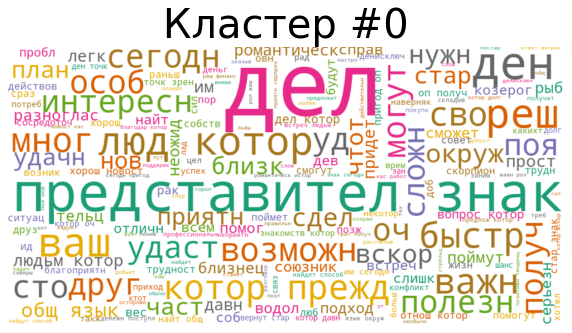

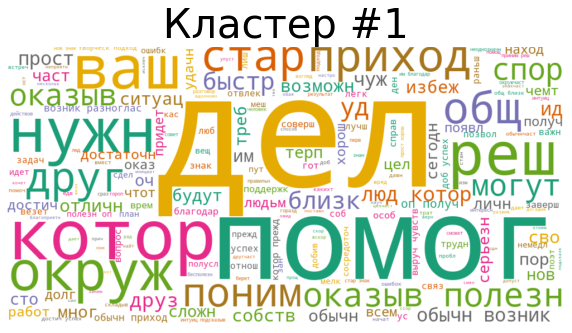

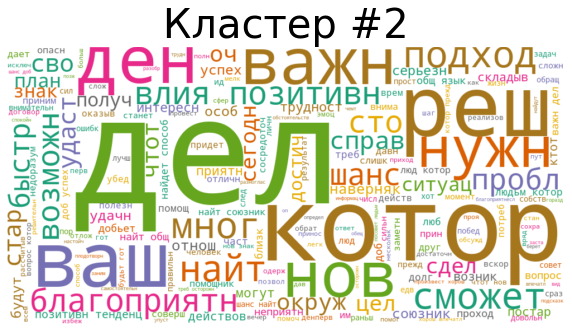

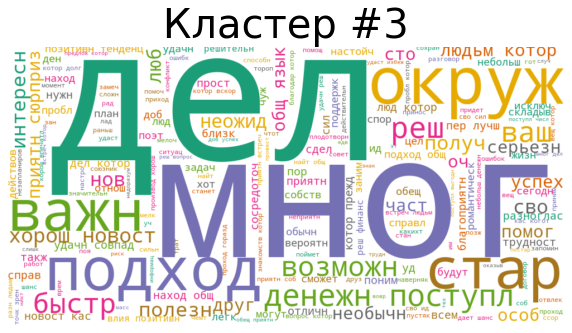

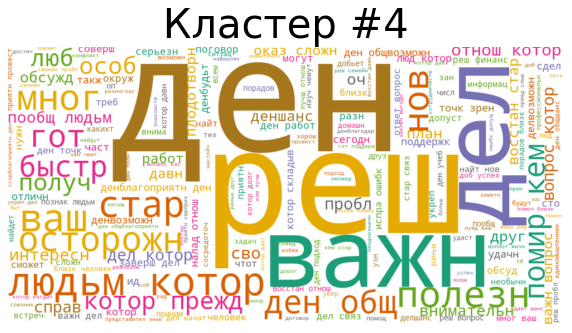

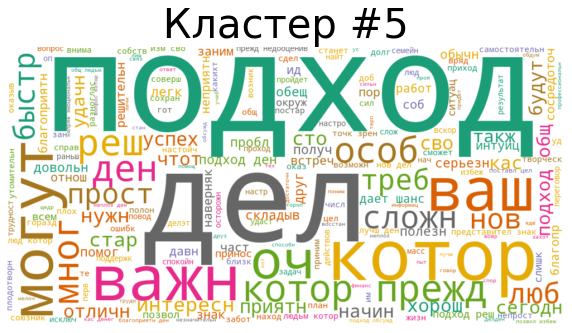

In [107]:
for i in range(num_clusters):
  wordcloud = WordCloud(background_color="white", width=1000, height=500,colormap='Dark2').generate(clusters_text[i])
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear',)
  plt.axis("off")
  plt.title("Кластер #" + str(i), fontsize=40)
  plt.show()